# **Exploratory Data - Step 2**

In [1]:
# Importing the drive module from google.colab library
from google.colab import drive

# Mounting the Google Drive to the Colab environment
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Changing the current directory to the 'GitHub' sub-directory "MarineMammalSoundClassification" located in the 'My Drive' directory on Google Drive
%cd drive/My Drive/GitHub/MarineMammalSoundClassification/data_22050/

[Errno 2] No such file or directory: 'drive/My Drive/GitHub/MarineMammalSoundClassification/data_22050/'
/content/drive/.shortcut-targets-by-id/1oJSL58N419Ve8pd0wCvgXEy52hLM2tJN/MarineMammalSoundClassification


In [ ]:
# Define the path
path = '/content/drive/My Drive/GitHub/MarineMammalSoundClassification/data_22050/'

In [2]:
# Import required libraries
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
print(os.listdir(path))

['AtlanticSpottedDolphin', 'BeardedSeal', 'Beluga_WhiteWhale', 'BottlenoseDolphin', 'BowheadWhale', 'ClymeneDolphin', 'CommonDolphin', 'FalseKillerWhale', "Fraser'sDolphin", "Grampus_Risso'sDolphin", 'HarpSeal', 'HumpbackWhale', 'KillerWhale', 'Long_FinnedPilotWhale', 'MelonHeadedWhale', 'Narwhal', 'NorthernRightWhale', 'PantropicalSpottedDolphin', 'RossSeal', 'Rough_ToothedDolphin', 'Short_Finned(Pacific)PilotWhale', 'SouthernRightWhale', 'SpermWhale', 'SpinnerDolphin', 'StripedDolphin', 'Walrus', 'White_beakedDolphin', 'White_sidedDolphin']


## **Overview of EDA**

The repeat exploratory data analysis (EDA), was implemented post-preprocessing of our data. To which end, all samples had been converted to tha same sample rate of 22050, and certain classes and files within specific class folders had been removed.

To which end the EDA this time utilised the folder "data_22050" and included the following steps:

* **Duration Distribution Analysis**:  We the distribution of the files' duration post-preprocessing.

* **Class Distribution Analysis**:  We explored the distribution of files across different classes, employing appropriate visualizations to highlight any imbalances or trends.

* **Statistical Summary**:  We investigated the five-number summary (minimum, first quartile, median, third quartile, and maximum) for each class concerning the files' duration, providing a concise statistical overview of the data.

Moreover, for improved understanding of the current format of our data we provide the sample of a random file as well as its spectogram.

## **Duration Distribution Analysis**



In [ ]:
# Load each WAV in the data directory, creating a a list of audio data and a list of sample rate using indexes
directory = '//content/drive/My Drive/GitHub/MarineMammalSoundClassification/data_22050'

## Lists to store audio data and sample rates
audio_data_list = []
# sample_rate_list = []
duration_list = []

## Recursively iterate over all files in the directory and subdirectories
for root, dirs, files in os.walk(directory):
    for filename in files:
        if filename.endswith('.wav'):
            # Load the WAV file
            filepath = os.path.join(root, filename)
            try:
                audio_data, sample_rate = librosa.load(filepath, sr=None)

                # Compute file duration
                duration = len(audio_data) / sample_rate

                # Append audio data and sample rate to lists
                audio_data_list.append(audio_data)
                # sample_rate_list.append(sample_rate)
                duration_list.append(duration)

                # Print information about the loaded file
                print("File:", filename)
                # print("Sample Rate:", sample_rate)
                print("Duration (seconds):", duration)
                print("Shape of Audio Data:", audio_data.shape)
                print()
            except Exception as e:
                print(f"Error loading {filename}: {e}")

Streaming output truncated to the last 5000 lines.
File: 6102101A.wav
Duration (seconds): 0.48281179138321995
Shape of Audio Data: (10646,)

File: 6102101B.wav
Duration (seconds): 0.3093877551020408
Shape of Audio Data: (6822,)

File: 6102101C.wav
Duration (seconds): 0.3093877551020408
Shape of Audio Data: (6822,)

File: 6102101F.wav
Duration (seconds): 0.6445351473922902
Shape of Audio Data: (14212,)

File: 6102101N.wav
Duration (seconds): 0.6960997732426304
Shape of Audio Data: (15349,)

File: 6102101T.wav
Duration (seconds): 0.6164172335600907
Shape of Audio Data: (13592,)

File: 61023001.wav
Duration (seconds): 4.0059410430839
Shape of Audio Data: (88331,)

File: 6102101U.wav
Duration (seconds): 0.656281179138322
Shape of Audio Data: (14471,)

File: 61023002.wav
Duration (seconds): 5.7686621315192745
Shape of Audio Data: (127199,)

File: 61023005.wav
Duration (seconds): 1.0156009070294785
Shape of Audio Data: (22394,)

File: 61023006.wav
Duration (seconds): 1.0093877551020407
Shape

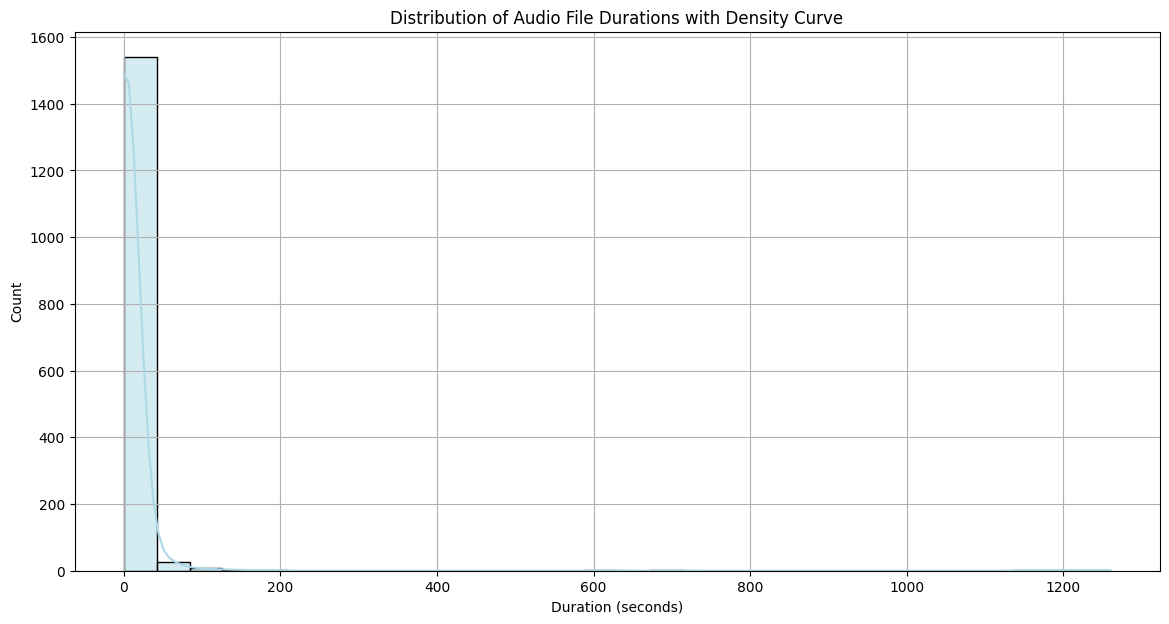

In [ ]:
# Visualize the distribution of audio file durations (histogram with density curve)

plt.figure(figsize=(14, 7))
sns.histplot(duration_list, kde=True, bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.title('Distribution of Audio File Durations with Density Curve')
plt.grid(True)
plt.show()

## **Class Distribution Analysis**

In [ ]:
# Create dictionairies to hold audio data and class counts
class_audio_data = {}
class_counts = {}

# Recursively iterate over all files in the directory and subdirectories
for root, dirs, files in os.walk(directory):
  for filename in files:
    if filename.endswith('.wav'):
      class_name = os.path.basename(root)
      filepath = os.path.join(root, filename)
      try:
        # Load the WAV file, with original sample rate
        audio_data, sample_rate = librosa.load(filepath, sr=None)

        # Append audio data to the class dictionary
        if class_name not in class_audio_data:
          class_audio_data[class_name] = []
          class_counts[class_name] = 0
        class_audio_data[class_name].append((audio_data, sample_rate))
        class_counts[class_name] += 1

        # Print information about the loaded file
        print(f"Loaded '{filename}' from class '{class_name}'. Sample rate: {sample_rate}, Duration: {len(audio_data) / sample_rate} seconds")
      except Exception as e:
        print(f"Error loading {filename}: {e}")

# Print summary statistics
print("\nSummary:")
for class_name, audios in class_audio_data.items():
  print(f"Class '{class_name} has {len(audios)} instances.")
total_instances = sum(class_counts.values())
print(f"Total number of instances: {total_instances}")

Loaded '61025003.wav' from class 'AtlanticSpottedDolphin'. Sample rate: 22050, Duration: 3.528027210884354 seconds
Loaded '61025001.wav' from class 'AtlanticSpottedDolphin'. Sample rate: 22050, Duration: 3.528027210884354 seconds
Loaded '61025002.wav' from class 'AtlanticSpottedDolphin'. Sample rate: 22050, Duration: 3.528027210884354 seconds
Loaded '61025004.wav' from class 'AtlanticSpottedDolphin'. Sample rate: 22050, Duration: 1.7639909297052154 seconds
Loaded '61025006.wav' from class 'AtlanticSpottedDolphin'. Sample rate: 22050, Duration: 1.7639909297052154 seconds
Loaded '61025007.wav' from class 'AtlanticSpottedDolphin'. Sample rate: 22050, Duration: 1.7639909297052154 seconds
Loaded '61025008.wav' from class 'AtlanticSpottedDolphin'. Sample rate: 22050, Duration: 3.528027210884354 seconds
Loaded '61025009.wav' from class 'AtlanticSpottedDolphin'. Sample rate: 22050, Duration: 2.646031746031746 seconds
Loaded '6102500A.wav' from class 'AtlanticSpottedDolphin'. Sample rate: 22050

In [ ]:
# Print summary in a table format
# Create a DataFrame from the class counts
class_summary_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Number of Instances'])

# Calculate the total number of instances
total_instances = class_summary_df['Number of Instances'].sum()

# Calculate the total number of classes
total_classes = len(class_summary_df)

# Append these totals to the DataFrame
total_instances_df = pd.DataFrame([['Total Instances', total_instances]], columns=['Class', 'Number of Instances'])
total_classes_df = pd.DataFrame([['Total Classes', total_classes]], columns=['Class', 'Number of Instances'])
class_summary_df = pd.concat([class_summary_df, total_instances_df, total_classes_df], ignore_index=True)

# Display the DataFrame as styled table
class_summary_styled = class_summary_df.style.set_properties(**{'text-align': 'left'})
class_summary_styled.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

# Highlight the total rows
def highlight_totals(row):
    if 'Total' in row['Class']:
        return ['font-weight: bold; background-color: #00008B']*2  # Light blue background for total rows
    return ['']*2

class_summary_styled = class_summary_styled.apply(highlight_totals, axis=1)
class_summary_styled

,Class,Number of Instances
0,AtlanticSpottedDolphin,58
1,BeardedSeal,27
2,Beluga_WhiteWhale,50
3,BottlenoseDolphin,24
4,BowheadWhale,50
5,ClymeneDolphin,63
6,CommonDolphin,52
7,FalseKillerWhale,59
8,Fraser'sDolphin,87
9,Grampus_Risso'sDolphin,67


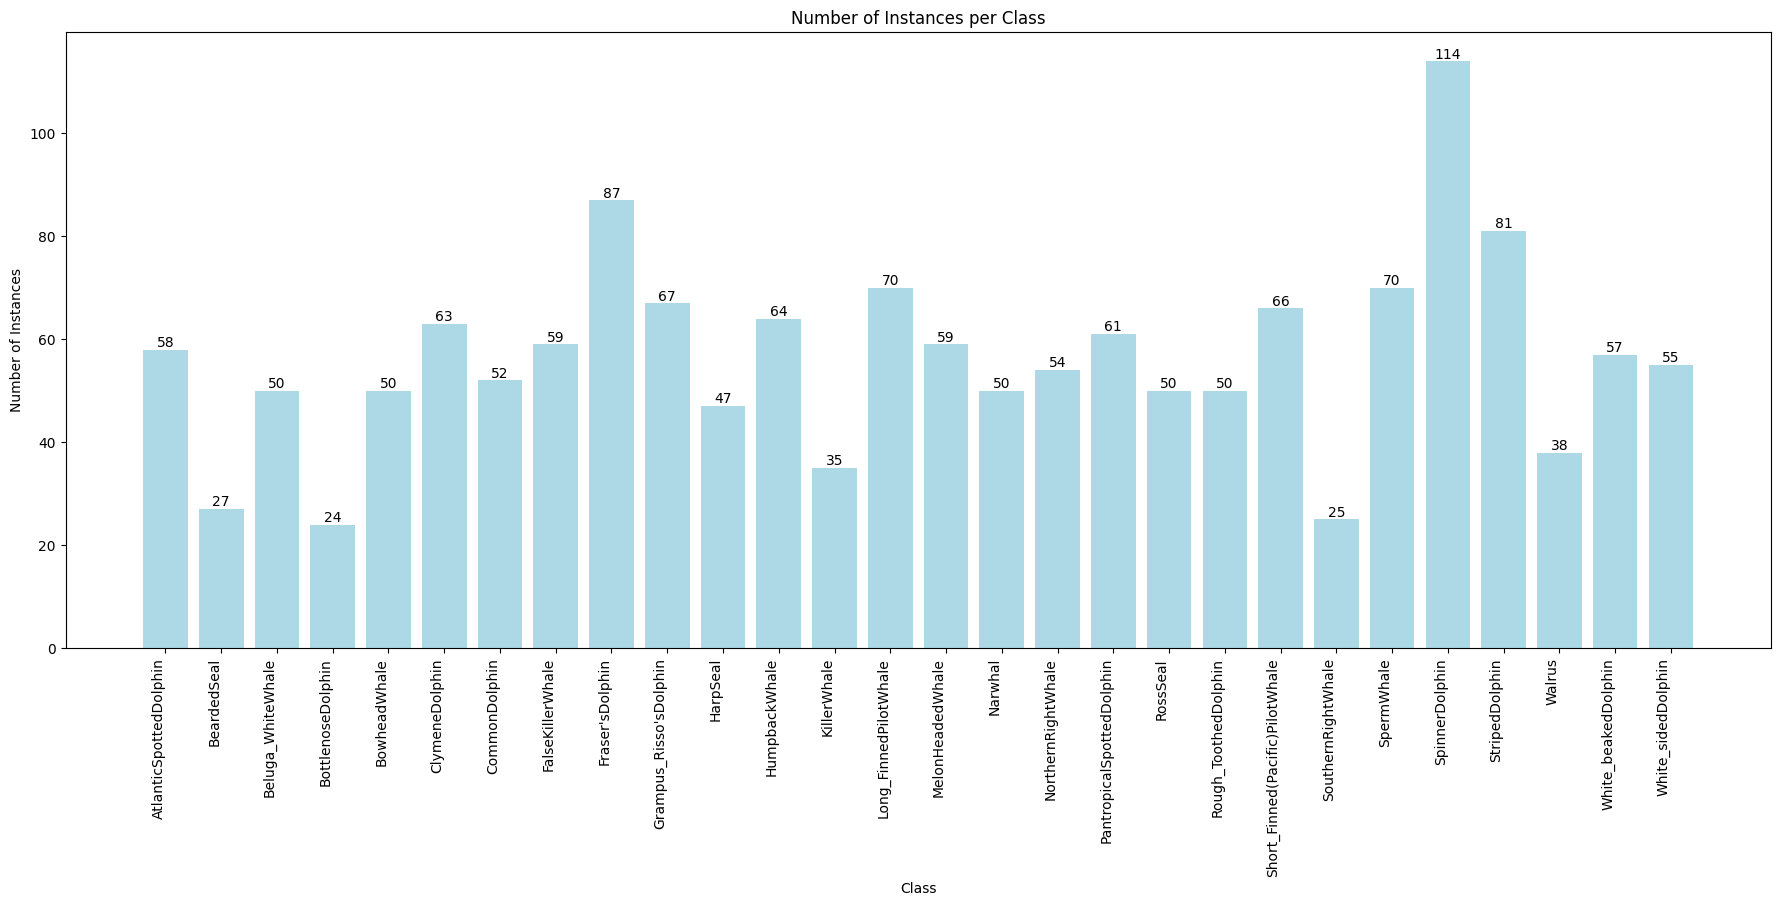

In [ ]:
# Visualize the class distribution
plt.figure(figsize=(22, 8))
bars = plt.bar(class_counts.keys(), class_counts.values(), color='lightblue')

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Number of Instances per Class')
plt.xticks(rotation=90, ha="right")  # Rotate class labels for better visibility
plt.show()

## **Summary Statistics**

In [ ]:
# A preview of the length of the files

# Dictionaries to store durations for each class
class_durations = {}

# Recursively iterate over all files in the directory and subdirectories
for root, dirs, files in os.walk(directory):
    for filename in files:
        if filename.endswith('.wav'):
            class_name = os.path.basename(root)
            filepath = os.path.join(root, filename)
            try:
                # Load the WAV file with original sample rate
                audio_data, sample_rate = librosa.load(filepath, sr=None)
                duration = len(audio_data) / sample_rate
                if class_name not in class_durations:
                    class_durations[class_name] = []
                class_durations[class_name].append(duration)
            except Exception as e:
                print(f"Error loading {filename}: {e}")

# Data structure to hold the summary for each class
class_summary_stats = {}

# Calculate the 5-number summary for each class
for class_name, durations in class_durations.items():
    summary = pd.Series(durations).describe(percentiles=[.25, .5, .75])
    class_summary_stats[class_name] = {
        'min': summary['min'],
        '25%': summary['25%'],
        'median': summary['50%'],
        '75%': summary['75%'],
        'max': summary['max']
    }

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Calculate the 5-number summary for each class and store in a DataFrame
class_summary_stats = {class_name: pd.Series(durations).describe(percentiles=[.25, .5, .75]).to_dict()
                       for class_name, durations in class_durations.items()}
summary_df = pd.DataFrame(class_summary_stats).T

# Display the DataFrame
print(summary_df.to_string())

                                 count       mean         std       min       25%        50%        75%          max
AtlanticSpottedDolphin            58.0   2.651357    7.505645  0.864580  1.332494   1.489048   1.763991    58.623175
BeardedSeal                       27.0   4.969747    7.879012  0.750023  1.265646   2.564082   6.324467    40.875011
Beluga_WhiteWhale                 50.0   2.626731    1.655173  0.522313  1.394535   2.097982   3.765578     8.731882
BottlenoseDolphin                 24.0   1.241551    0.217944  0.768571  1.124989   1.265488   1.303129     1.875011
BowheadWhale                      50.0   4.581517    1.553524  1.824036  3.654331   4.179524   5.331009     9.708345
ClymeneDolphin                    63.0   2.576014    3.705874  0.305170  1.417959   1.919773   2.582812    24.106077
CommonDolphin                     52.0   6.610235   15.132793  0.220726  1.139388   1.854195   2.423685    53.048209
FalseKillerWhale                  59.0   1.157757    0.947632  0

In [ ]:
# Apply a style to the DataFrame for visualisation purposes
styled_df = summary_df.style.format("{:.2f}")  # Format numbers to two decimal places
styled_df = styled_df.background_gradient(cmap='Blues')  # Apply a gradient based on values

# Display the styled DataFrame
styled_df

,count,mean,std,min,25%,50%,75%,max
AtlanticSpottedDolphin,58.00,2.65,7.51,0.86,1.33,1.49,1.76,58.62
BeardedSeal,27.00,4.97,7.88,0.75,1.27,2.56,6.32,40.88
Beluga_WhiteWhale,50.00,2.63,1.66,0.52,1.39,2.10,3.77,8.73
BottlenoseDolphin,24.00,1.24,0.22,0.77,1.12,1.27,1.30,1.88
BowheadWhale,50.00,4.58,1.55,1.82,3.65,4.18,5.33,9.71
ClymeneDolphin,63.00,2.58,3.71,0.31,1.42,1.92,2.58,24.11
CommonDolphin,52.00,6.61,15.13,0.22,1.14,1.85,2.42,53.05
FalseKillerWhale,59.00,1.16,0.95,0.29,0.61,0.90,1.29,5.77
Fraser'sDolphin,87.00,5.83,9.28,0.34,0.94,1.89,3.78,32.76
Grampus_Risso'sDolphin,67.00,2.57,6.10,0.25,0.41,0.61,2.29,35.63


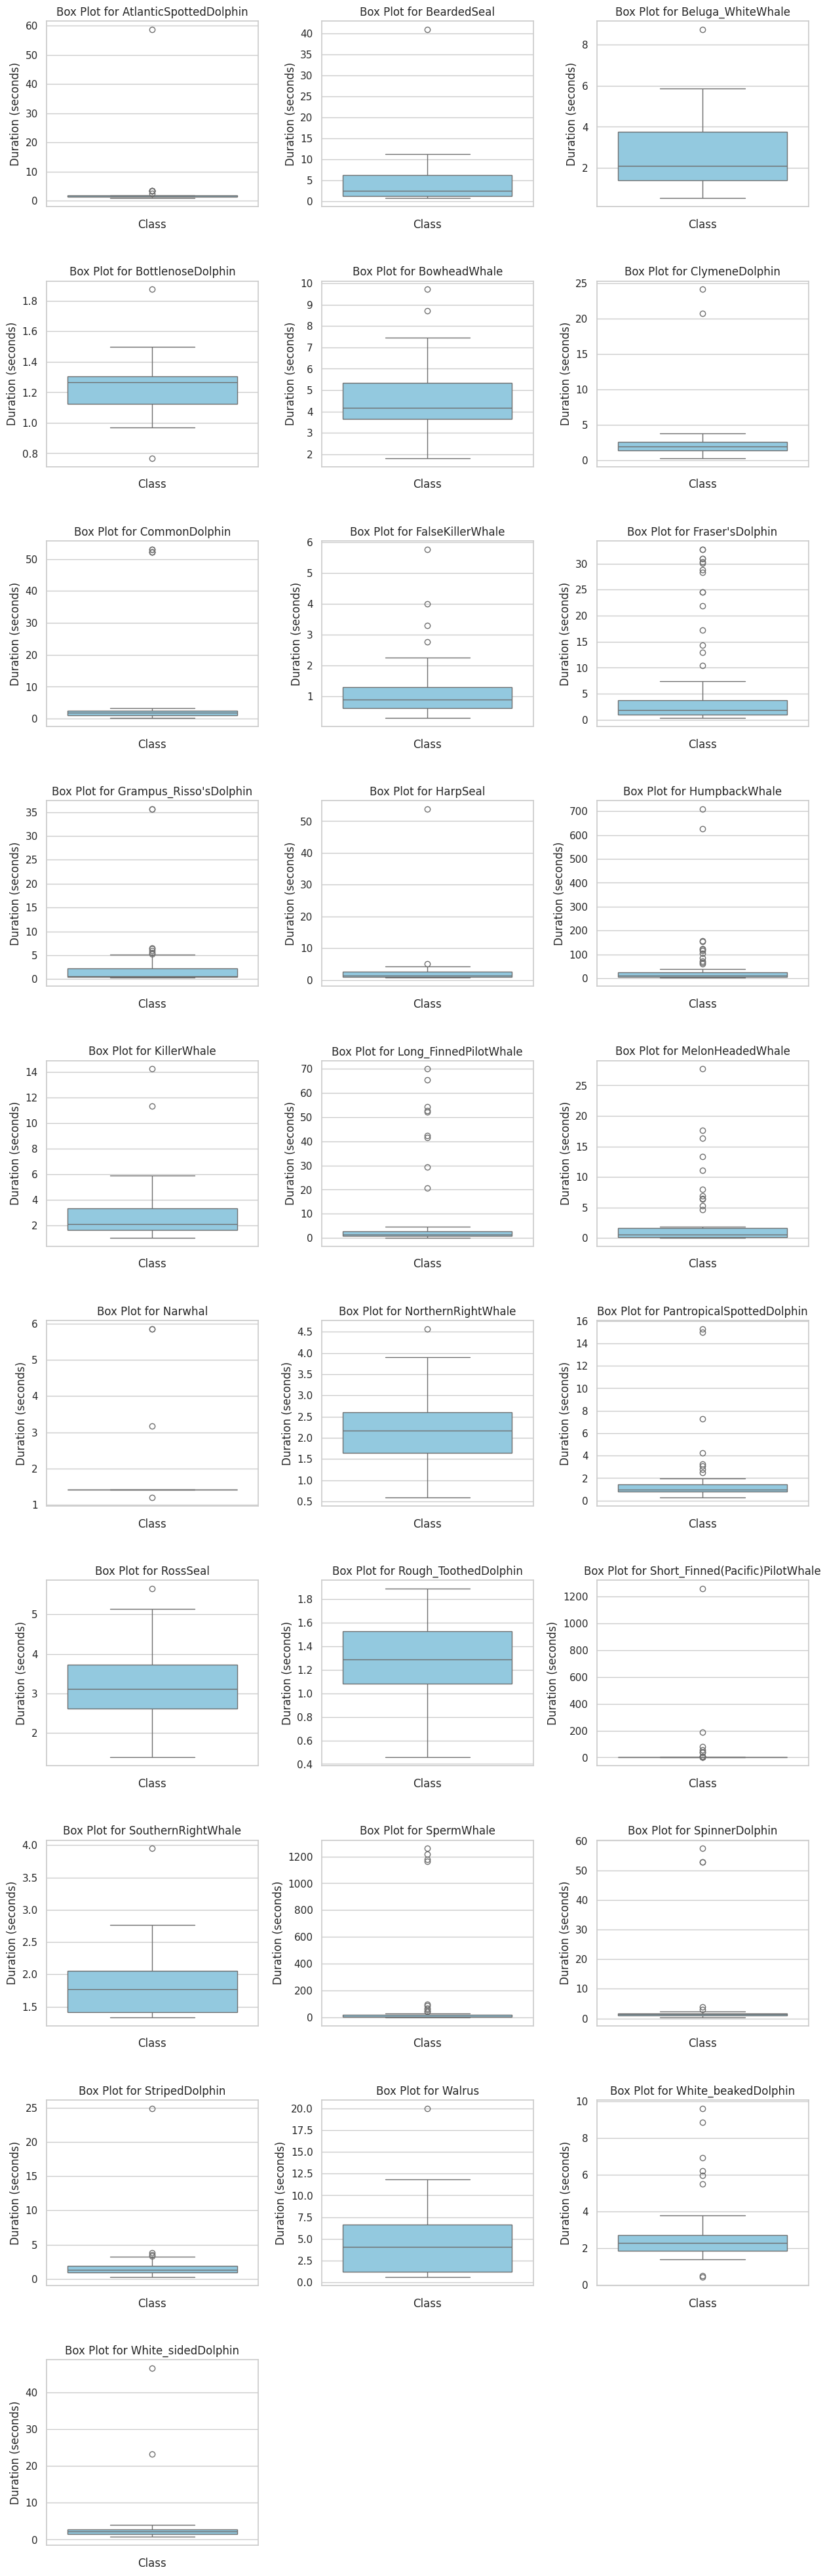

In [ ]:
# Use a whitegrid
sns.set(style="whitegrid")

# Number of plots per row
plots_per_row = 3

# Calculate the number of required rows
num_classes = len(class_durations)
num_rows = (num_classes + plots_per_row - 1) // plots_per_row

# Set up the figure and axes
fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 5))  # Adjust the figure size as needed
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust horizontal and vertical spacing

# Plot data
for idx, (class_name, durations) in enumerate(class_durations.items()):
    ax = axs[idx // plots_per_row, idx % plots_per_row]
    sns.boxplot(data=durations, color='skyblue', ax=ax)
    ax.set_title(f'Box Plot for {class_name}')
    ax.set_xlabel('Class')
    ax.set_ylabel('Duration (seconds)')

# Hide any unused axes if the number of classes isn't a perfect multiple of plots_per_row
if num_classes % plots_per_row:
    for ax in axs.flatten()[num_classes:]:
        ax.set_visible(False)

plt.show()

## **A sample of our data**

In [5]:
# Define the file's path (sample 72020008.wav from Walrus)
file_path = '/content/drive/My Drive/GitHub/MarineMammalSoundClassification/data_22050/Walrus/72020008.wav'

In [ ]:
import IPython.display as ipd
ipd.Audio(file_path)

In [4]:
# Create the respective spectrogram and melgram
%cd /content/drive/My Drive/GitHub/MarineMammalSoundClassification/
from utils.spec_functions import create_spectrogram, create_melgram, segment_audio
from utils.display import display_spectogram

/content/drive/My Drive/GitHub/MarineMammalSoundClassification


In [ ]:
y, sr = librosa.load(file_path, sr=None)
spectrogram = create_spectrogram(y)
melgram = create_melgram(y, sr)

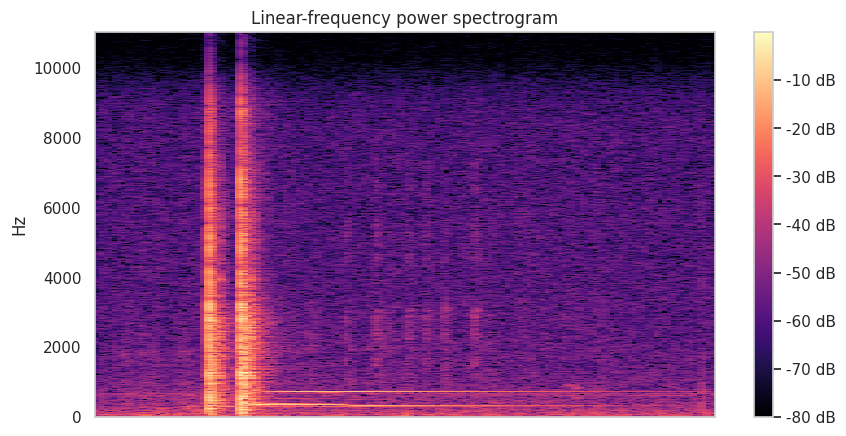

In [ ]:
display_spectogram(spectrogram)

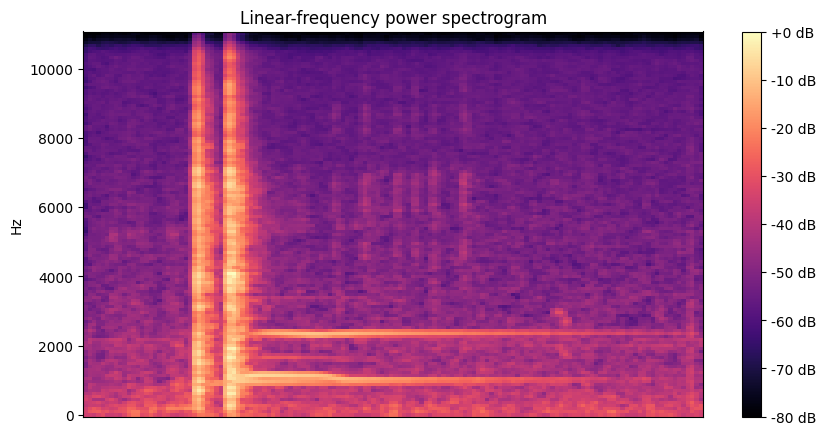

In [ ]:
display_spectogram(melgram)

Spectrogram 1


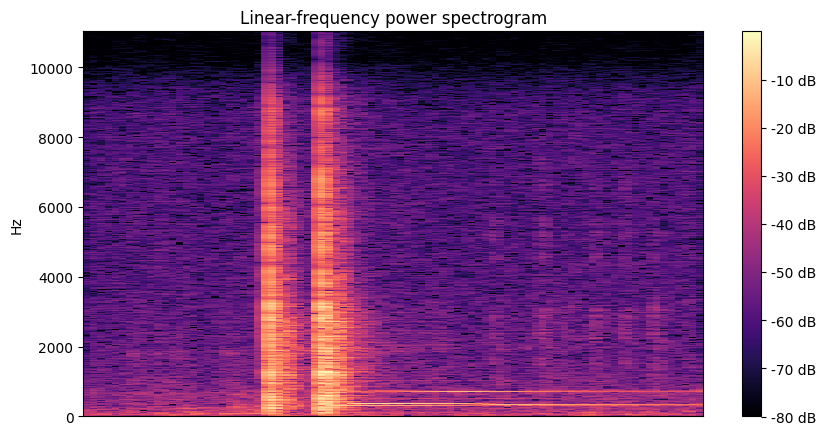

Melgram 1


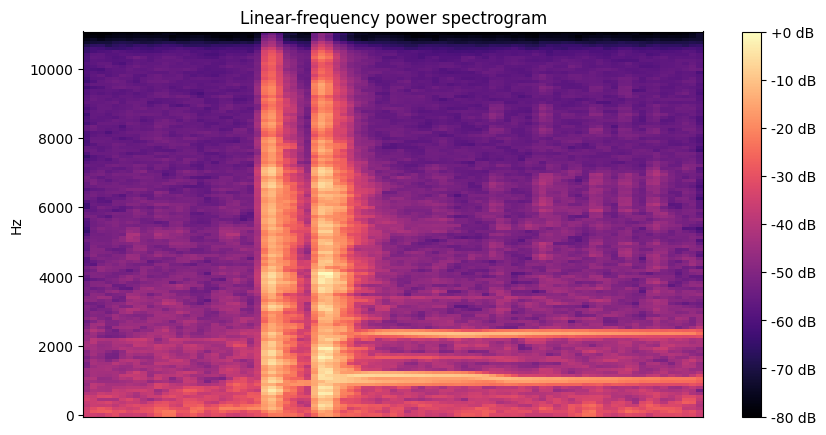

Spectrogram 2


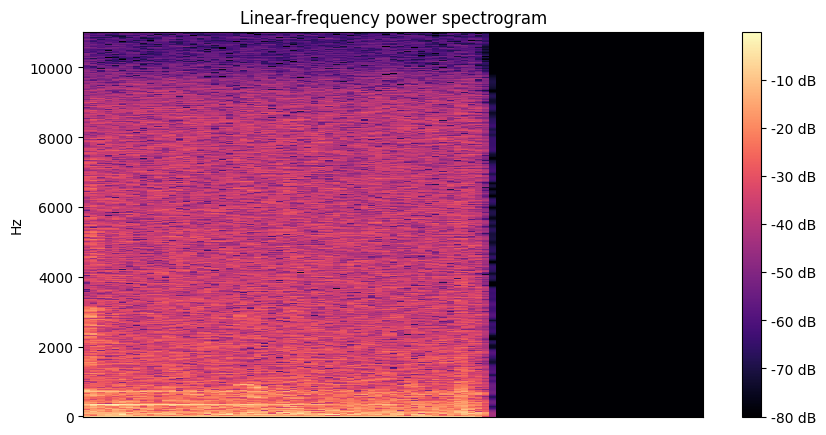

Melgram 2


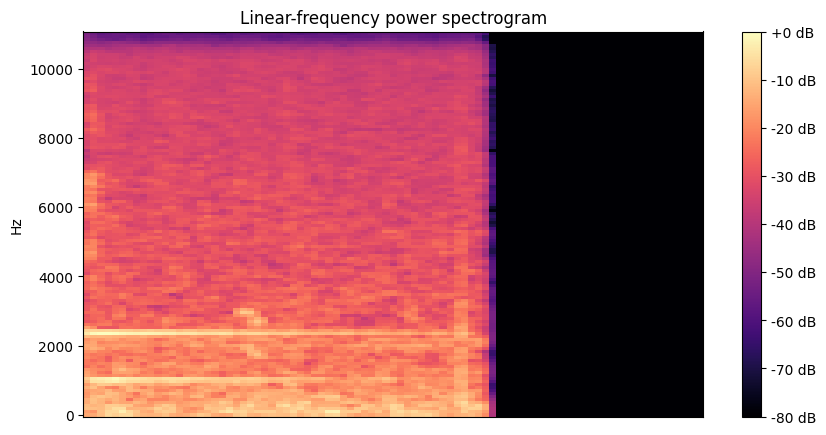

In [6]:
seg_dur = 2.0

segments, sr = segment_audio(file_path, seg_dur)  # Segment the audio file

# Process each segment
for i, segment in enumerate(segments):
    spectrogram = create_spectrogram(segment)
    print('Spectrogram '+ str(i+1))
    display_spectogram(spectrogram)
    print('Melgram '+ str(i+1))
    melgram = create_melgram(segment, sr)
    display_spectogram(melgram)
